In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
import numpy as np

In [31]:
bert_base_data_path = "../output/mnli_berts/bert-base/training_td_metrics.jsonl"
bert_distil_data_path = "../output/mnli_berts/bert-distilbert/training_td_metrics.jsonl"
bert_distil_data_path_18 = "../output/mnli_berts/bert-distilbert-18/training_td_metrics.jsonl"

def read_jsonl(file_name):
    jsonfile = [json.loads(line) for line in open(file_name)]
    df = pd.DataFrame(jsonfile)
    return df

df_bert_base = read_jsonl(bert_base_data_path)
df_bert_distil = read_jsonl(bert_distil_data_path)
df_bert_distil18 = read_jsonl(bert_distil_data_path_18)


In [32]:
df_bert_base.sort_values(by = "guid", inplace = True)
df_bert_distil.sort_values(by = "guid", inplace = True)
df_bert_distil18.sort_values(by = "guid", inplace = True)

In [33]:
df_bert_base.head()

,guid,index,threshold_closeness,confidence,final_confidence,variability,mean_variability,correctness,forgetfulness
123908,3,123908,0.249825,0.486760,0.514748,0.169472,0.123677,3,2
226059,13,226059,0.053935,0.942793,0.980892,0.031885,0.022735,5,0
346284,23,346284,0.224740,0.658933,0.679074,0.139397,0.095594,4,1
13130,33,13130,0.184942,0.755065,0.774284,0.176464,0.122212,5,0
218841,43,218841,0.156171,0.193684,0.711122,0.102081,0.075719,0,1000


In [34]:
df_bert_distil.head()

,guid,index,threshold_closeness,confidence,final_confidence,variability,mean_variability,correctness,forgetfulness
123908,3,123908,0.204760,0.287304,0.600869,0.121078,0.084027,0,1000
226059,13,226059,0.097006,0.891145,0.916267,0.065710,0.044347,5,0
346284,23,346284,0.245098,0.570017,0.510536,0.069699,0.052868,5,0
13130,33,13130,0.150141,0.816005,0.748031,0.112174,0.076237,5,0
218841,43,218841,0.085379,0.094265,0.872319,0.037205,0.027770,0,1000


In [35]:
df_bert_distil18.head()

,guid,index,threshold_closeness,confidence,final_confidence,variability,mean_variability,correctness,forgetfulness
209201,3,209201,0.150328,0.184291,0.724028,0.061850,0.046516,0,1000
60665,13,60665,0.086008,0.904959,0.939162,0.041454,0.028180,5,0
259393,23,259393,0.216685,0.682523,0.749171,0.046164,0.033638,5,0
258607,33,258607,0.136125,0.837454,0.766609,0.106214,0.071046,5,0
302556,43,302556,0.077946,0.085206,0.934765,0.026946,0.020315,0,1000


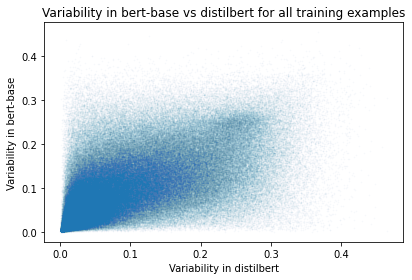

In [5]:
plt.scatter(df_bert_base.variability.values, df_bert_distil.variability.values, s = 1, alpha = 0.02)
plt.ylabel("Variability in bert-base")
plt.xlabel("Variability in distilbert")
plt.title("Variability in bert-base vs distilbert for all training examples")
plt.tight_layout()
plt.savefig("figures/varcompare_base_distil_small.png", dpi = 200)

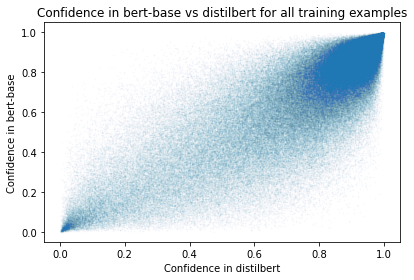

In [6]:
plt.scatter(df_bert_base.confidence.values, df_bert_distil.confidence.values, s = 1, alpha = 0.02)
plt.ylabel("Confidence in bert-base")
plt.xlabel("Confidence in distilbert")
plt.title("Confidence in bert-base vs distilbert for all training examples")
plt.tight_layout()
plt.savefig("figures/confcompare_base_distil_small.png", dpi = 200)

In [14]:
from scipy.stats.stats import pearsonr
print("variability r score is", pearsonr(df_bert_base.variability.values, df_bert_distil.variability.values))
print("confidence r score is", pearsonr(df_bert_base.confidence.values, df_bert_distil.confidence.values))

variability r score is (0.5820182234301451, 0.0)
confidence r score is (0.861525537557903, 0.0)


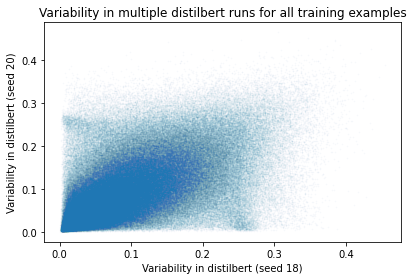

In [27]:
plt.scatter(df_bert_distil.variability.values, df_bert_distil18.variability.values, s = 1, alpha = 0.02)
plt.ylabel("Variability in distilbert (seed 20)")
plt.xlabel("Variability in distilbert (seed 18)")
plt.title("Variability in multiple distilbert runs for all training examples")
plt.tight_layout()
plt.savefig("figures/varcompare_18_20_small.png", dpi = 200)

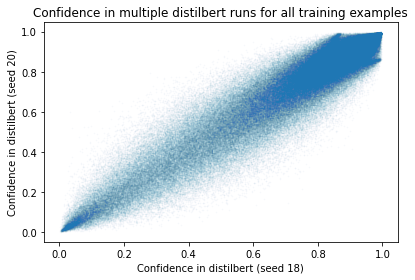

In [29]:
plt.scatter(df_bert_distil.confidence.values, df_bert_distil18.confidence.values, s = 1, alpha = 0.02)
plt.ylabel("Confidence in distilbert (seed 20)")
plt.xlabel("Confidence in distilbert (seed 18)")
plt.title("Confidence in multiple distilbert runs for all training examples")
plt.tight_layout()
plt.savefig("figures/confcompare_18_20.png", dpi = 2000)

In [30]:
print("variability r score is", pearsonr(df_bert_distil.variability.values, df_bert_distil18.variability.values))
print("confidence r score is", pearsonr(df_bert_distil.confidence.values, df_bert_distil18.confidence.values))

variability r score is (0.5322306328207769, 0.0)
confidence r score is (0.9523914811502584, 0.0)


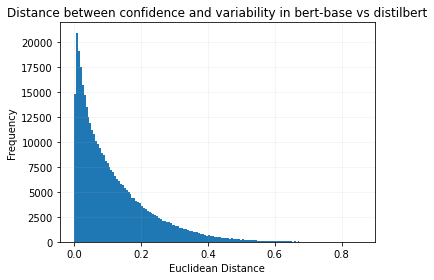

In [69]:
diffs = tuple(zip(df_bert_base.variability.values - df_bert_distil.variability.values,
          df_bert_base.confidence.values - df_bert_distil.confidence.values))

def l2_norm(diffs):
    return np.sqrt(np.sum(np.square(diffs), axis = 1))

changes = l2_norm(diffs)

plt.hist(changes, bins = 150)
plt.grid(alpha = 0.15)
plt.ylabel("Frequency")
plt.xlabel("Euclidean Distance")
plt.title("Distance between confidence and variability in bert-base vs distilbert")
plt.tight_layout()
plt.savefig("figures/hist.png", dpi = 200)

In [48]:
changes_with_id = tuple(zip(df_bert_base.index.values, changes))
top_changes_ids = sorted(changes_with_id, key = lambda x: x[1])
thresh = 10000
lo_changes = top_changes_ids[:thresh]
hi_changes = top_changes_ids[-thresh:]
lo_changes_idx = [x[0] for x in lo_changes]
hi_changes_idx = [x[0] for x in hi_changes]

In [65]:
# Load in MNLI train dat
mnli_path = "../data/glue/MNLI/train.tsv"
mnli = pd.read_csv(mnli_path, delimiter = "\t", error_bad_lines=False)
print(len(df_bert_base))
print(len(mnli))
mnli.head()

b'Skipping line 24810: expected 12 fields, saw 13\nSkipping line 33961: expected 12 fields, saw 13\n'
b'Skipping line 75911: expected 12 fields, saw 13\nSkipping line 100114: expected 12 fields, saw 13\n'
b'Skipping line 150638: expected 12 fields, saw 13\nSkipping line 158834: expected 12 fields, saw 13\nSkipping line 173104: expected 12 fields, saw 13\nSkipping line 178252: expected 12 fields, saw 13\n'
b'Skipping line 221951: expected 12 fields, saw 13\n'
b'Skipping line 286845: expected 12 fields, saw 13\nSkipping line 314110: expected 12 fields, saw 13\n'


392702
391165


,index,promptID,pairID,genre,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,label1,gold_label
0,0,31193,31193n,government,( ( Conceptually ( cream skimming ) ) ( ( has ...,( ( ( Product and ) geography ) ( ( are ( what...,(ROOT (S (NP (JJ Conceptually) (NN cream) (NN ...,(ROOT (S (NP (NN Product) (CC and) (NN geograp...,Conceptually cream skimming has two basic dime...,Product and geography are what make cream skim...,neutral,neutral
1,1,101457,101457e,telephone,( you ( ( know ( during ( ( ( the season ) and...,( You ( ( ( ( lose ( the things ) ) ( to ( the...,(ROOT (S (NP (PRP you)) (VP (VBP know) (PP (IN...,(ROOT (S (NP (PRP You)) (VP (VBP lose) (NP (DT...,you know during the season and i guess at at y...,You lose the things to the following level if ...,entailment,entailment
2,2,134793,134793e,fiction,( ( One ( of ( our number ) ) ) ( ( will ( ( (...,( ( ( A member ) ( of ( my team ) ) ) ( ( will...,(ROOT (S (NP (NP (CD One)) (PP (IN of) (NP (PR...,(ROOT (S (NP (NP (DT A) (NN member)) (PP (IN o...,One of our number will carry out your instruct...,A member of my team will execute your orders w...,entailment,entailment
3,3,37397,37397e,fiction,( ( How ( ( ( do you ) know ) ? ) ) ( ( All th...,( ( This information ) ( ( belongs ( to them )...,(ROOT (S (SBARQ (WHADVP (WRB How)) (SQ (VBP do...,(ROOT (S (NP (DT This) (NN information)) (VP (...,How do you know? All this is their information...,This information belongs to them.,entailment,entailment
4,4,50563,50563n,telephone,( yeah ( i ( ( tell you ) ( what ( ( though ( ...,( ( The ( tennis shoes ) ) ( ( have ( ( a rang...,(ROOT (S (VP (VB yeah) (S (NP (FW i)) (VP (VB ...,(ROOT (S (NP (DT The) (NN tennis) (NNS shoes))...,yeah i tell you what though if you go price so...,The tennis shoes have a range of prices.,neutral,neutral


In [66]:
mnli_lo_change = mnli[mnli.index.isin(lo_changes_idx)]
mnli_hi_change = mnli[mnli.index.isin(hi_changes_idx)]
print(len(mnli_lo_change))
print(len(mnli_hi_change))

9934
9958


In [60]:
def str_len(col):
    return [len(x) if isinstance(x, str) else 0 for x in col]

In [67]:
print(mnli_lo_change.gold_label.value_counts())
print(mnli_lo_change.label1.value_counts())
print(mnli_lo_change.genre.value_counts())
print(np.mean(str_len(mnli_lo_change["sentence1"].values)))
print(np.mean(str_len(mnli_lo_change["sentence2"].values)))
print(mnli_lo_change["sentence1"].values)
print(mnli_lo_change["sentence2"].values)

neutral          3433
contradiction    3257
entailment       3244
Name: gold_label, dtype: int64
neutral          3433
contradiction    3257
entailment       3244
Name: label1, dtype: int64
telephone     2137
travel        1971
fiction       1966
slate         1950
government    1910
Name: genre, dtype: int64
113.54771491846185
56.681497886047914
['He mostly hangs out with a group of older, Southern black men, who call him Jumper and Black Cat.'
 'What involvement did other key players have in connection with these accountability failures?'
 'The point is not that investing in foreign companies is necessarily a mistake.'
 ... "Blackmail is saying you'll tell unless you are given money."
 "Four monasteries developed as a source of protection still remain, and each has a church, monks' quarters and a sturdy high wall."
 'Houseboats are a beautifully preserved tradition of the heyday of the British Raj.']
['The group of guys he tends to hang out with gave him the nickname Jumper.'
 'Nobod

In [68]:
print(mnli_hi_change.gold_label.value_counts())
print(mnli_hi_change.label1.value_counts())
print(mnli_hi_change.genre.value_counts())
print(np.mean(str_len(mnli_hi_change["sentence1"].values)))
print(np.mean(str_len(mnli_hi_change["sentence2"].values)))
print(mnli_hi_change["sentence1"].values)
print(mnli_hi_change["sentence2"].values)

entailment       3398
neutral          3296
contradiction    3264
Name: gold_label, dtype: int64
entailment       3398
neutral          3296
contradiction    3264
Name: label1, dtype: int64
telephone     2154
government    2008
fiction       1948
slate         1947
travel        1901
Name: genre, dtype: int64
114.17383008636273
56.47730467965455
['In 2000, GNP was less than GDP because income receipts from the rest of the world were less than U.S. payments to the rest of the world.'
 'you know and held over for trial' "but uh what's that" ...
 "Court Merrigan from TeleRead wrote: 'You not likely come across anything quite like Password Incorrect any time soon."
 'Breasts have lost much of their mythological aura and acquired some needed reality.'
 'Many responses pivoted on the amusing contrast between uptown swells and downtown schlubs, but this reliable device, the mighty comic engine that generated so many terrific Depression-era comedies and dimwitted Lampoon movies--Snobs vs.']
['